# Experimento 4

Variação do Experimento 3 com topologia fechando um ciclo.

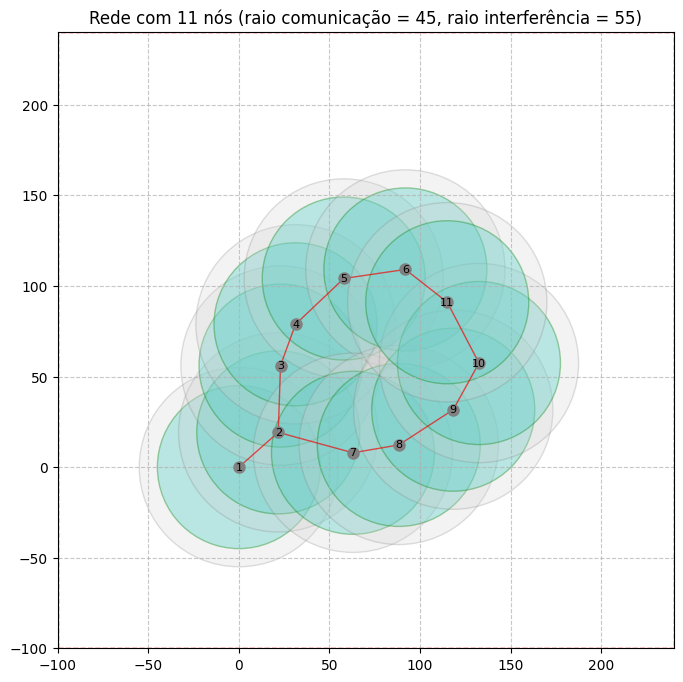


=== MÉDIAS POR MOTE ===
           node  rtt_latency  r2n_latency  n2r_latency   rssi  radio_rx_energy_mj  radio_tx_energy_mj  cpu_energy_mj  throughput1  throughput2
fd00::202:2:2:2        31.61 1.717500e+02 1.839281e+19 -63.81              202.55                2.15          18.06         0.00         1.13
fd00::203:3:3:3       115.06 1.838963e+19 5.761100e+02 -78.76              215.70                1.01          19.18        35.13        53.46
fd00::204:4:4:4       185.41 2.600400e+02 2.298660e+17 -54.83              215.80                0.66          19.25         8.17        32.77
fd00::205:5:5:5       267.16 7.767050e+18 4.498500e+02 -78.77              205.01                0.04          18.32        22.37        27.58
fd00::206:6:6:6       334.38 6.148000e+02 7.913544e+18 -73.78              207.60                0.00          18.39         9.57        11.19
fd00::207:7:7:7        87.38 7.004000e+01 7.808000e+01 -89.73              211.17                0.77          19.17 

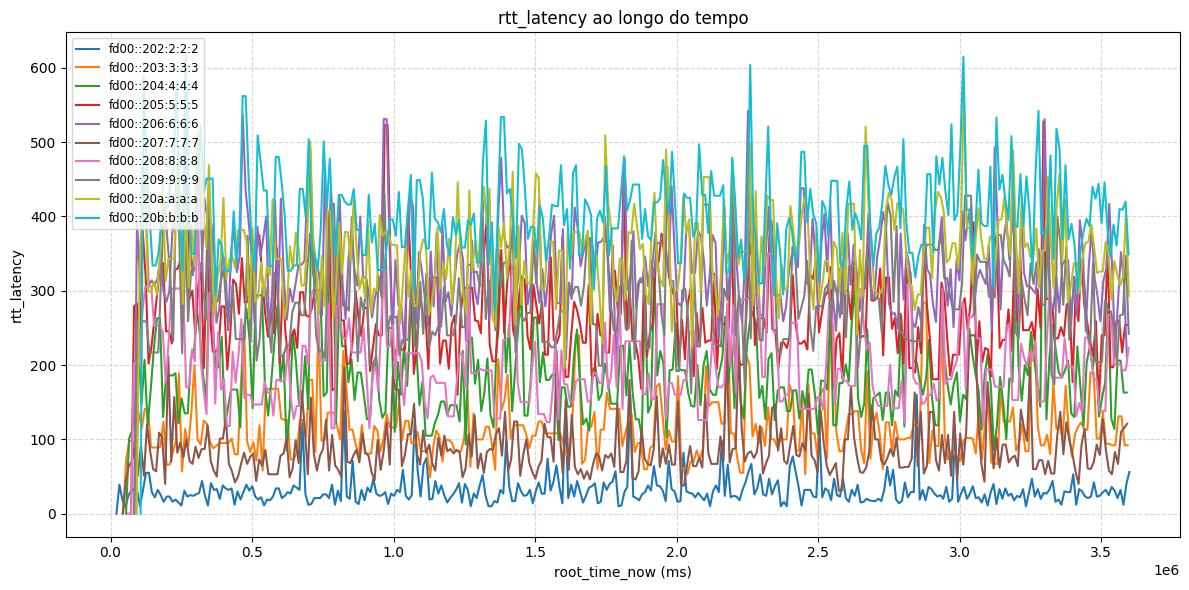

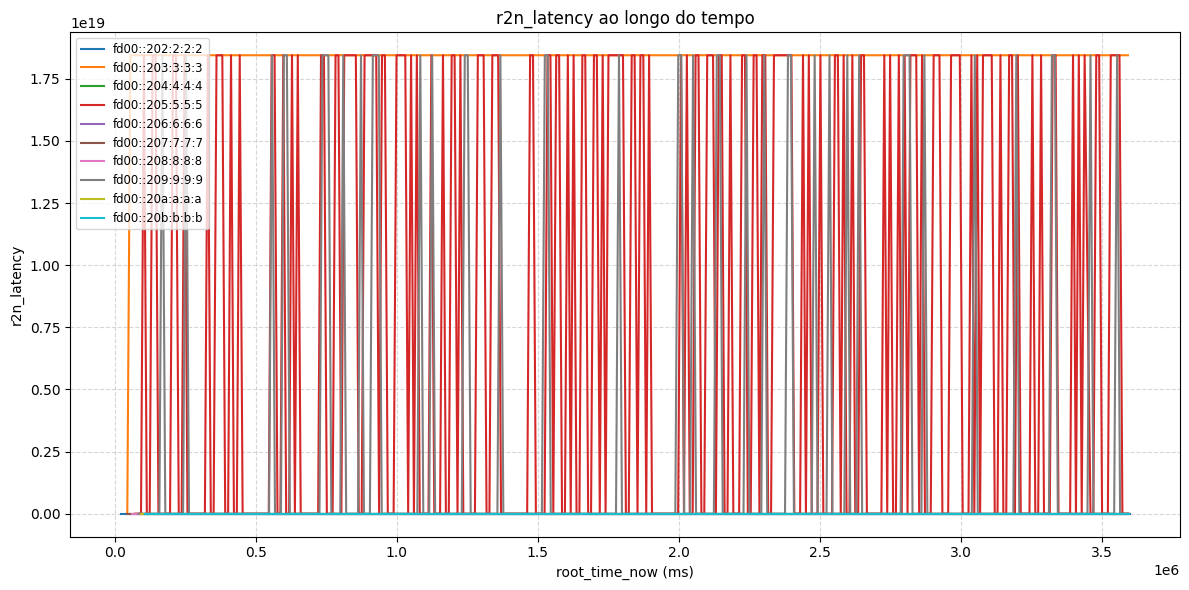

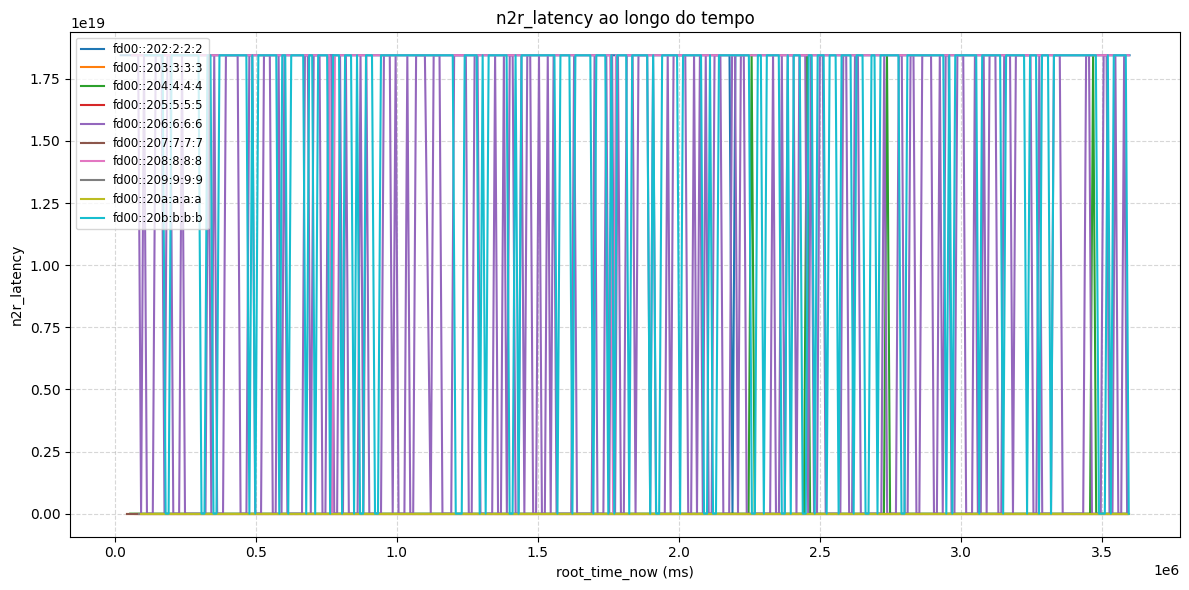

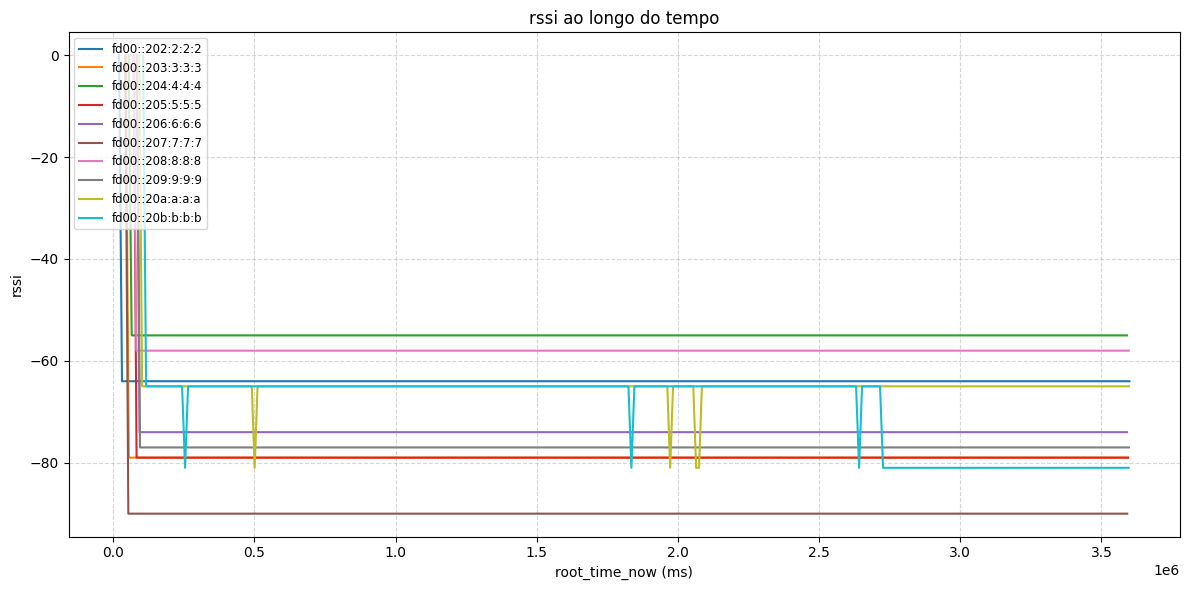

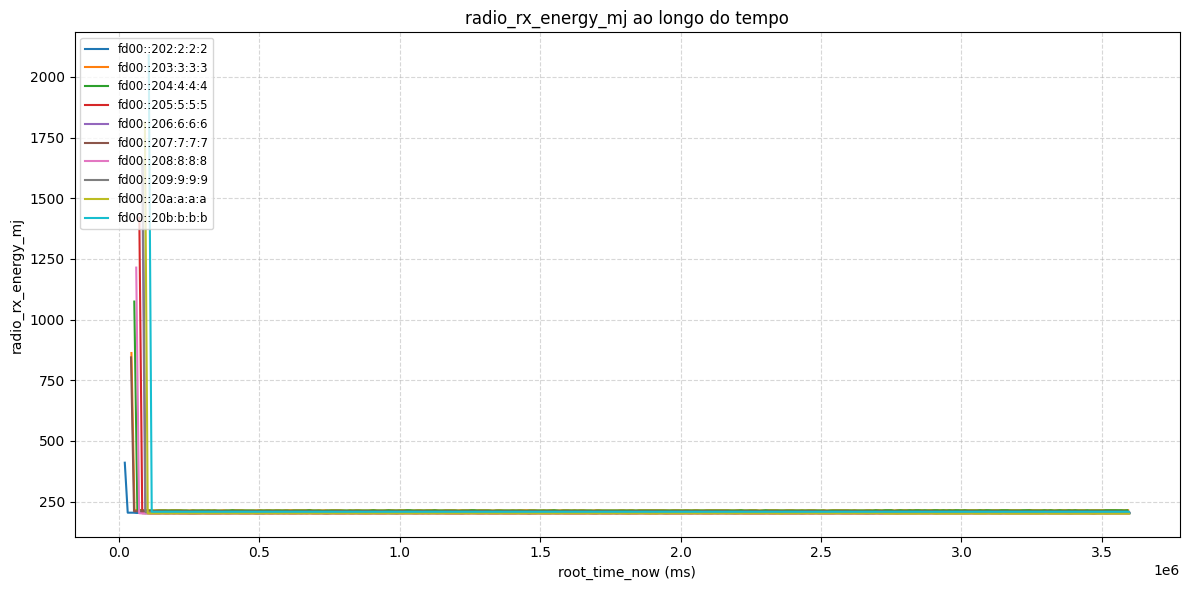

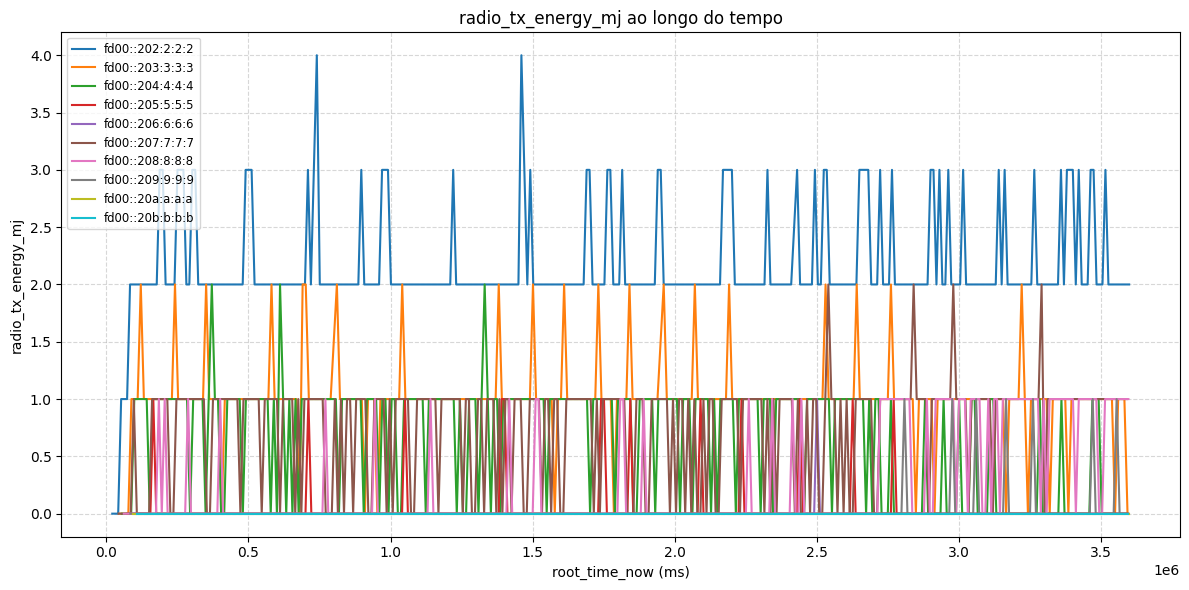

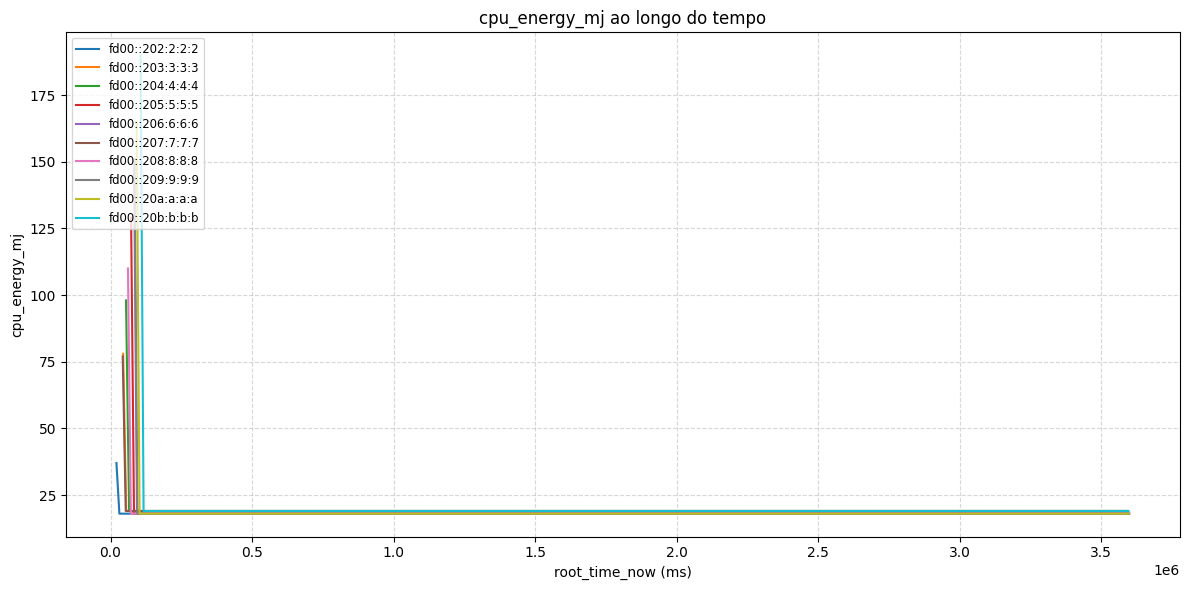

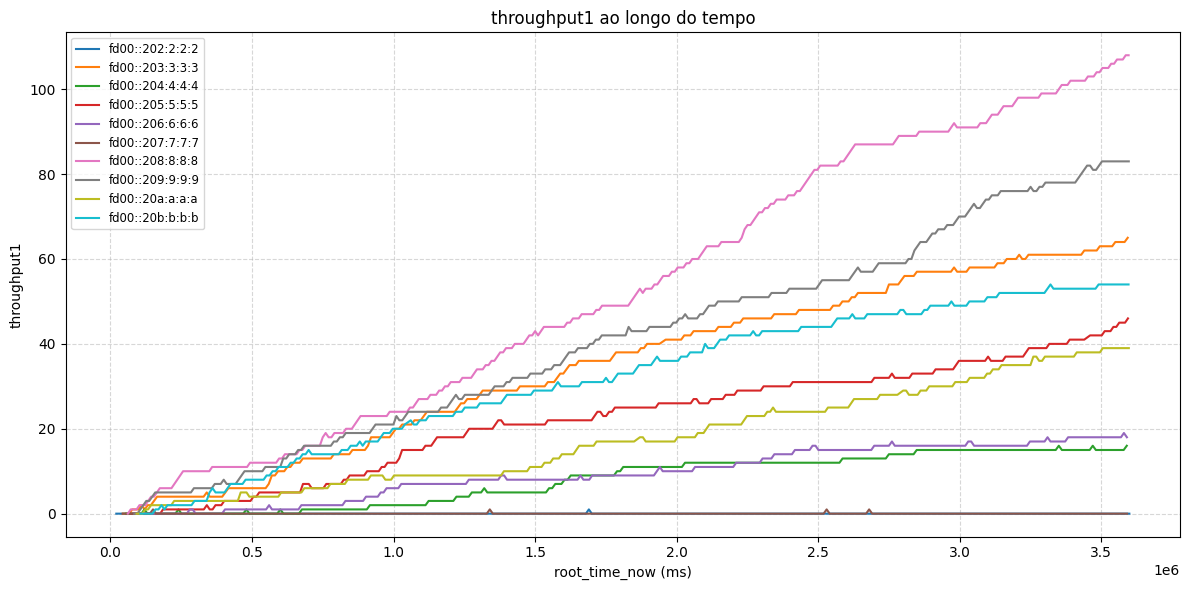

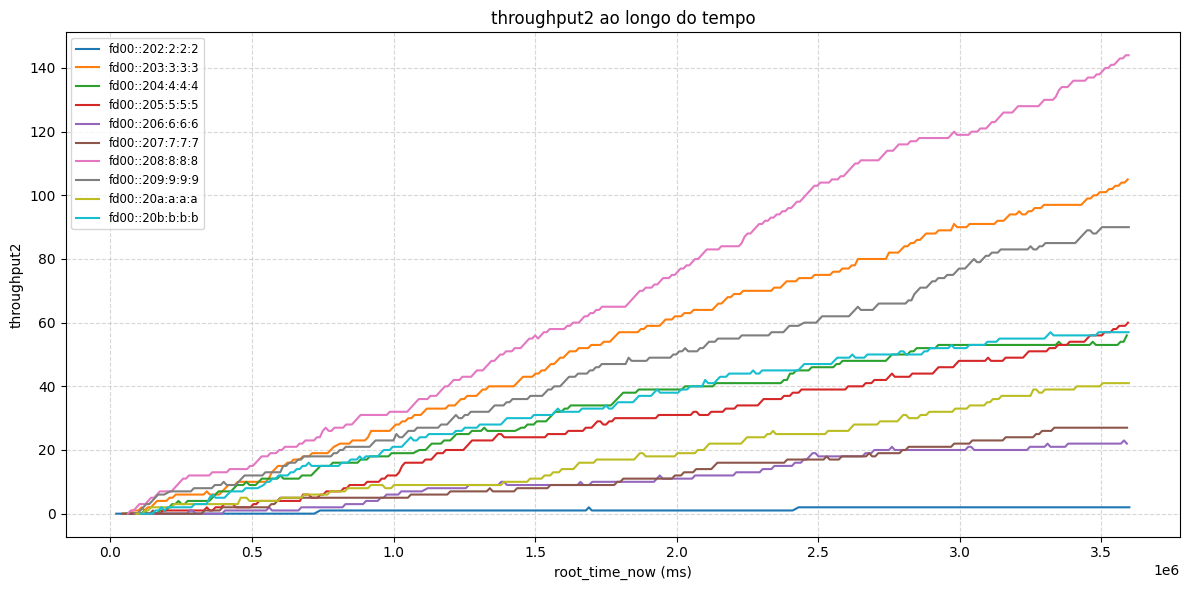

In [1]:
import sys, os

project_path = os.path.abspath(os.path.join(os.getcwd(), "../../../../.."))  # Ajuste conforme a localização do notebook
if project_path not in sys.path:
    sys.path.insert(0, project_path)
    
from pylib import visual
from pylib import data_analysis

exp = visual.plot_network_from_json("inputExample.json")

import matplotlib.pyplot as plt
from pathlib import Path

# -------------------------- Configurações ----------------------------------
log_path = Path("./cooja.log")          # arquivo de log de entrada
csv_full  = Path("cooja_metrics.csv")   # métricas individuais
csv_means = Path("cooja_means.csv")     # médias por mote

# -------------------------- DataFrame bruto --------------------------------
df = data_analysis.convert_log_to_csv(log_path, csv_full)

# ------------------------- Médias por mote ---------------------------------
metrics_cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "throughput1",
    "throughput2",
]

means = (
    df.groupby("node")[metrics_cols]
      .mean()
      .round(2)            # duas casas decimais para facilitar leitura
      .reset_index()
)

means.to_csv(csv_means, index=False)
print("\n=== MÉDIAS POR MOTE ===")
print(means.to_string(index=False))
# --------------------------- Plots -----------------------------------------
unique_nodes = df["node"].unique()

for metric in metrics_cols:
    plt.figure(figsize=(12, 6))
    for node in unique_nodes:
        node_df = df[df["node"] == node]
        plt.plot(
            node_df["root_time_now"],
            node_df[metric],
            label=f"{node}",
        )
    plt.title(f"{metric} ao longo do tempo")
    plt.xlabel("root_time_now (ms)")
    plt.ylabel(metric)
    plt.legend(loc="upper left", fontsize="small")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()